<a href="https://colab.research.google.com/github/GuiSSMartins/DTx-Project/blob/Faustino_Testes/MNIST_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.utils import to_categorical


In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()


11490434/11490434 [==============================] - 0s 0us/step


In [3]:
# Normalização dos pixels para valores entre 0 e 1
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# Redimensionamento das imagens para o formato (28, 28, 1)
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

# Codificação one-hot das classes
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


In [4]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))


In [5]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [6]:
history = model.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.1)


Epoch 1/5
844/844 [==============================] - 59s 68ms/step - loss: 0.1869 - accuracy: 0.9443 - val_loss: 0.0804 - val_accuracy: 0.9758
Epoch 2/5
844/844 [==============================] - 40s 47ms/step - loss: 0.0586 - accuracy: 0.9815 - val_loss: 0.0519 - val_accuracy: 0.9852
Epoch 3/5
844/844 [==============================] - 41s 48ms/step - loss: 0.0401 - accuracy: 0.9873 - val_loss: 0.0381 - val_accuracy: 0.9890
Epoch 4/5
844/844 [==============================] - 42s 49ms/step - loss: 0.0311 - accuracy: 0.9899 - val_loss: 0.0366 - val_accuracy: 0.9900
Epoch 5/5
844/844 [==============================] - 40s 48ms/step - loss: 0.0237 - accuracy: 0.9924 - val_loss: 0.0370 - val_accuracy: 0.9908


In [7]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)


313/313 [==============================] - 2s 7ms/step - loss: 0.0313 - accuracy: 0.9894
Test accuracy: 0.9894000291824341


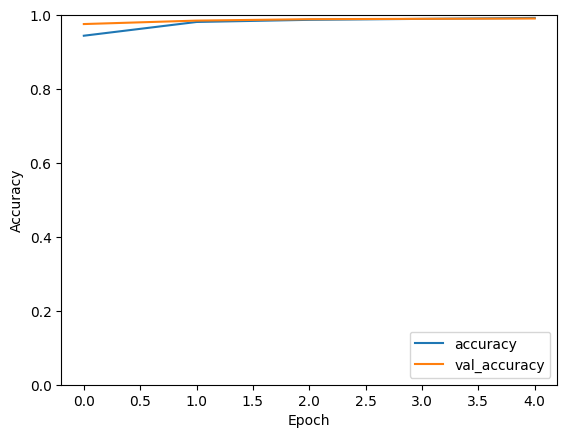

In [8]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()


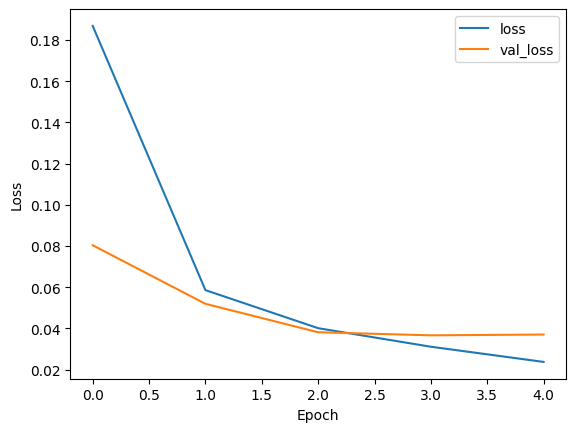

In [9]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()


11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/100
844/844 [==============================] - 27s 13ms/step - loss: 0.3752 - accuracy: 0.8864 - val_loss: 0.0476 - val_accuracy: 0.9850
Epoch 2/100
844/844 [==============================] - 10s 12ms/step - loss: 0.1007 - accuracy: 0.9718 - val_loss: 0.0331 - val_accuracy: 0.9903
Epoch 3/100
844/844 [==============================] - 10s 12ms/step - loss: 0.0732 - accuracy: 0.9785 - val_loss: 0.0320 - val_accuracy: 0.9908
Epoch 4/100
844/844 [==============================] - 10s 12ms/step - loss: 0.0656 - accuracy: 0.9813 - val_loss: 0.0252 - val_accuracy: 0.9932
Epoch 5/100
844/844 [==============================] - 10s 11ms/step - loss: 0.0545 - accuracy: 0.9847 - val_loss: 0.0336 - val_accuracy: 0.9905
Epoch 6/100
844/844 [==============================] - 10s 12ms/step - loss: 0.0515 - accuracy: 0.9856 - val_loss: 0.0317 - val_accuracy: 0.9918
Epoch 7/100
844/844 [==============================] - 10s 12ms/s

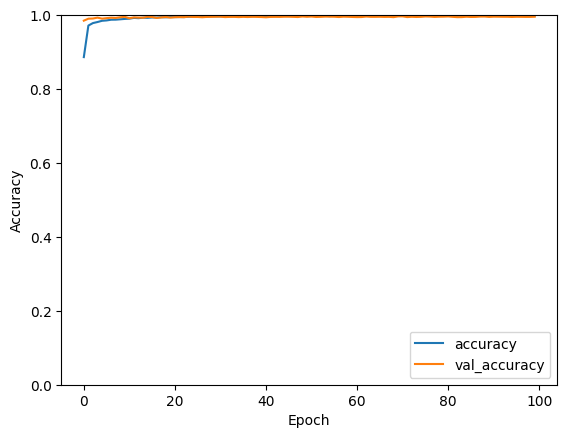

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout
from keras.utils import to_categorical

# Carregar o conjunto de dados MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Pré-processamento dos dados
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1)).astype('float32') / 255
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1)).astype('float32') / 255
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Definir a estrutura do modelo
input_shape = (28, 28, 1)
num_classes = 10
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same', input_shape = input_shape),
    Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'),
    Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same' ),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same' ),
    Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same' ),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),


    Flatten(),

    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),

    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.4),

    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(num_classes, activation='softmax')
])

# Compilar o modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Treinar o modelo
history = model.fit(x_train, y_train, epochs=100, batch_size=64, validation_split=0.1)

# Avaliar o modelo
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

# Visualizar a precisão e a perda ao longo do treinamento
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()



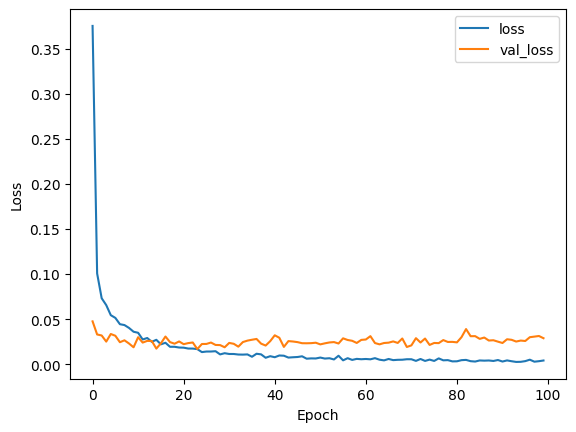

In [2]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()